Import necessary Python libraries.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Read the CSV file into a DataFrame and Print the first few rows of the DataFrame

In [5]:
dataframe = pd.read_csv("Zomato data .csv")
print(dataframe.head())


                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


To clean and preprocess the 'rate' column in the DataFrame by converting the ratings from a string format (e.g., '4.5/5') to a float format (e.g., 4.5). This makes it easier to perform numerical analysis and computations on the rating values.

In [6]:
def handleRate(value):
	value=str(value).split('/')
	value=value[0];
	return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)
print(dataframe.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


summary of a DataFrame

In [7]:
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


This count plot helps to visualize the distribution of different types of restaurants in the dataset. It shows how many restaurants fall into each category, making it easier to identify the most and least common types of restaurants.

Text(0.5, 0, 'Type of restaurant')

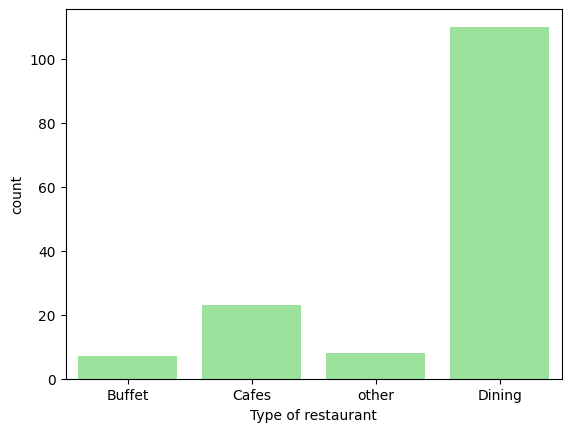

In [9]:
sns.countplot(x=dataframe['listed_in(type)'],color='lightgreen')
plt.xlabel("Type of restaurant")


 helps to visualize the total number of votes received by each type of restaurant. It provides insights into which types of restaurants are more popular or have higher customer engagement based on the number of votes.

Text(0, 0.5, 'Votes')

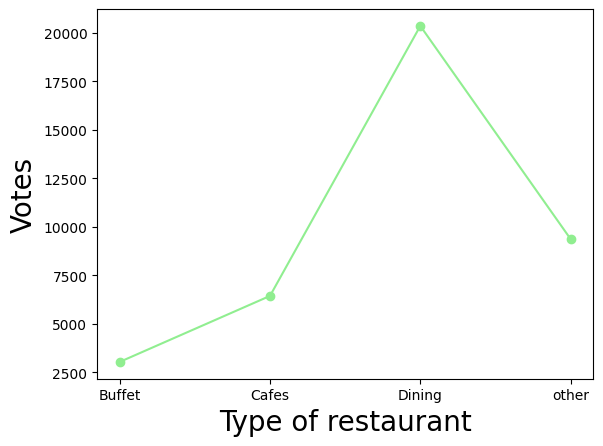

In [11]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="lightgreen", marker="o")
plt.xlabel("Type of restaurant", c="black", size=20)
plt.ylabel("Votes", c="black", size=20)


 Determine the restaurant’s name that received the maximum votes based on a given dataframe.

In [ ]:
max_votes = dataframe['votes'].max()
restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

print("Restaurant(s) with the maximum votes:")
print(restaurant_with_max_votes)


Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


explore the online_order column.

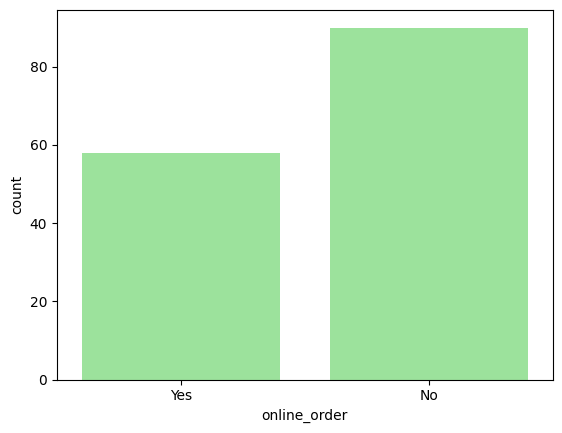

In [12]:
sns.countplot(x=dataframe['online_order'],color='lightgreen')
plt.show()

explore the rate column.

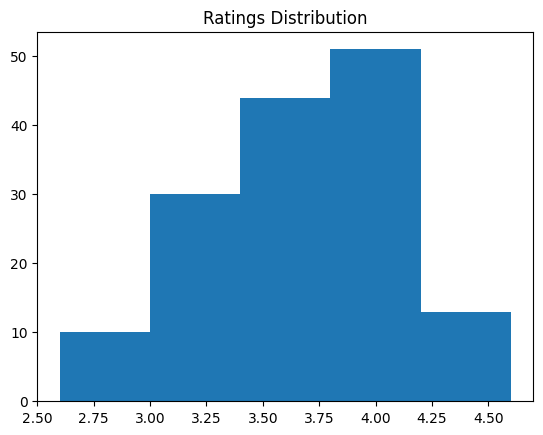

In [ ]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()


 explore the rate column.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

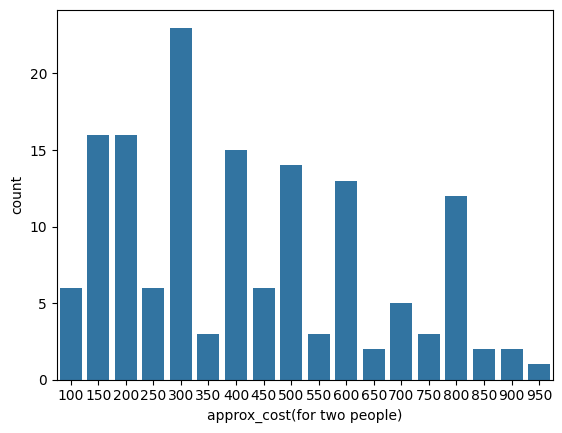

In [ ]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)


examine whether online orders receive higher ratings than offline orders.

<Axes: xlabel='online_order', ylabel='rate'>

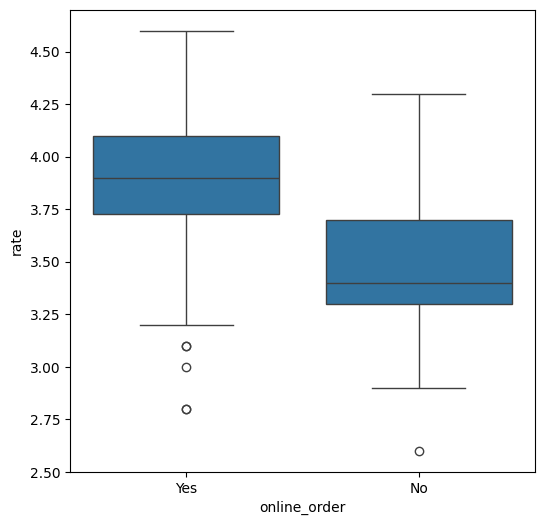

In [ ]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)


To visualize the relationship between restaurant types and their online order availability.

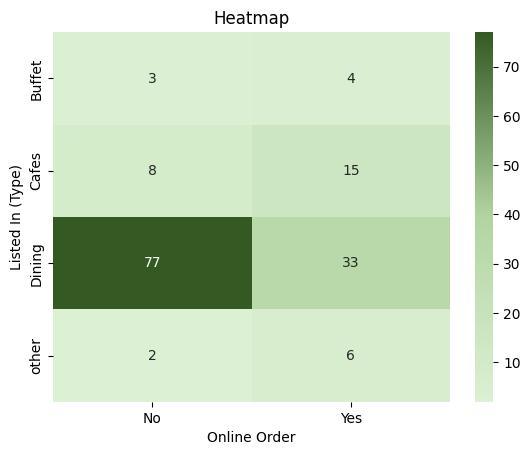

In [17]:
from matplotlib.colors import LinearSegmentedColormap

pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
colors = ["#dcf0d3", "#b1d4a1", "#345923"]
cmap = LinearSegmentedColormap.from_list("YellowOrangeBlue", colors)

sns.heatmap(pivot_table, annot=True, cmap=cmap, fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()


Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.